https://www.statlearning.com/

# CHAPTER 3: Applied

### 8.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

#### (a) 

In [2]:
Auto = pd.read_csv('auto.csv')
Auto['year']=1900+Auto['year']
Auto.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,1970,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,1970,1,buick skylark 320


In [3]:
X=Auto['horsepower']
X=sm.add_constant(X)
y=Auto['mpg']

In [4]:
model = sm.OLS(y, X).fit()
ar=round(model.rsquared_adj,3)

i. [QUESTION] Is there a relationship between the predictor and the response?

In [5]:
print(f'p-value={model.f_pvalue}')

p-value=7.031989029403965e-81


**[ANSWER] There is relationship between the predictor and the response as p-value is small**

ii. [QUESTION] How strong is the relationship between the predictor and
the response?

In [6]:
print(f'adjusted R2={ar}')

adjusted R2=0.605


**[ANSWER] relationship between the predictor and the response is moderate. See adjusted R2**

iii. [QUESTION] Is the relationship between the predictor and the response
positive or negative?

In [7]:
print(f'slope={model.params[1]}')

slope=-0.15784473335365368


**[ANSWER] Relationship between the predictor and the response is negative**

iv. [QUESTION] What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals?

In [8]:
X_test = pd.DataFrame({'const': [1], 'horsepower': [98]})
y_hat=model.get_prediction(X_test)

In [9]:
pi=y_hat.conf_int(obs=True, alpha=0.05)
print(f'Prediction interval (95%)={pi[0]}')

Prediction interval (95%)=[14.80939607 34.12475823]


#### (b)

In [10]:
def abline(ax, b, m, *args, **kwargs):
    'Add a line with slope m and intercept b to ax'
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)

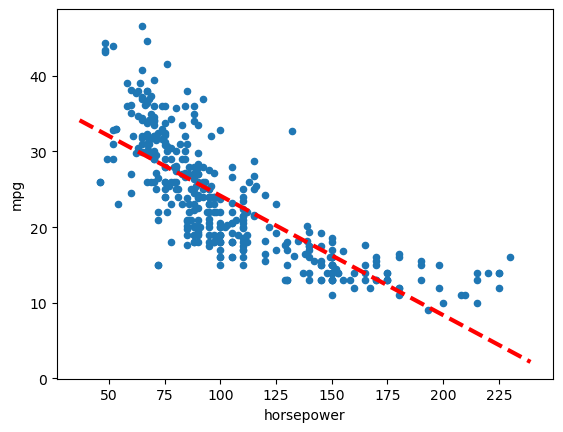

In [11]:
ax = Auto.plot.scatter('horsepower', 'mpg')
abline(ax,
       model.params[0],
       model.params[1],
       'r--',
       linewidth=3)

#### (c)

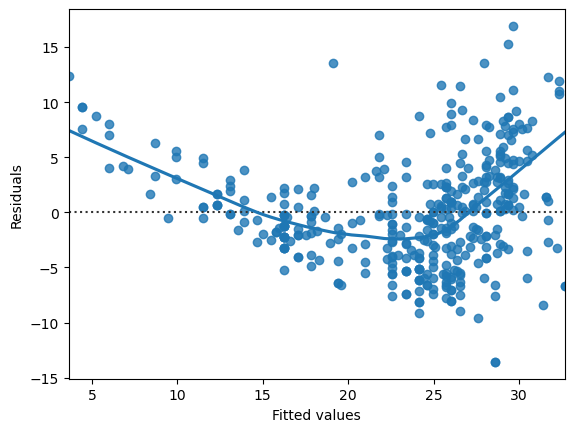

In [12]:
ax = sns.residplot(x=model.fittedvalues,y=y,lowess=True)
ax.set(xlabel='Fitted values', ylabel='Residuals')
plt.show()

**[ANSWER] On the basis of the residual plot, there is some evidence of non-linearity**

***

### 9.

#### (a) 

In [13]:
Auto = pd.get_dummies(Auto,columns=['cylinders','origin'], drop_first= True)
Auto.head(2)

,mpg,displacement,horsepower,weight,acceleration,year,name,cylinders_4,cylinders_5,cylinders_6,cylinders_8,origin_2,origin_3
0,18.0,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,0,0,0,1,0,0
1,15.0,350.0,165,3693,11.5,1970,buick skylark 320,0,0,0,1,0,0


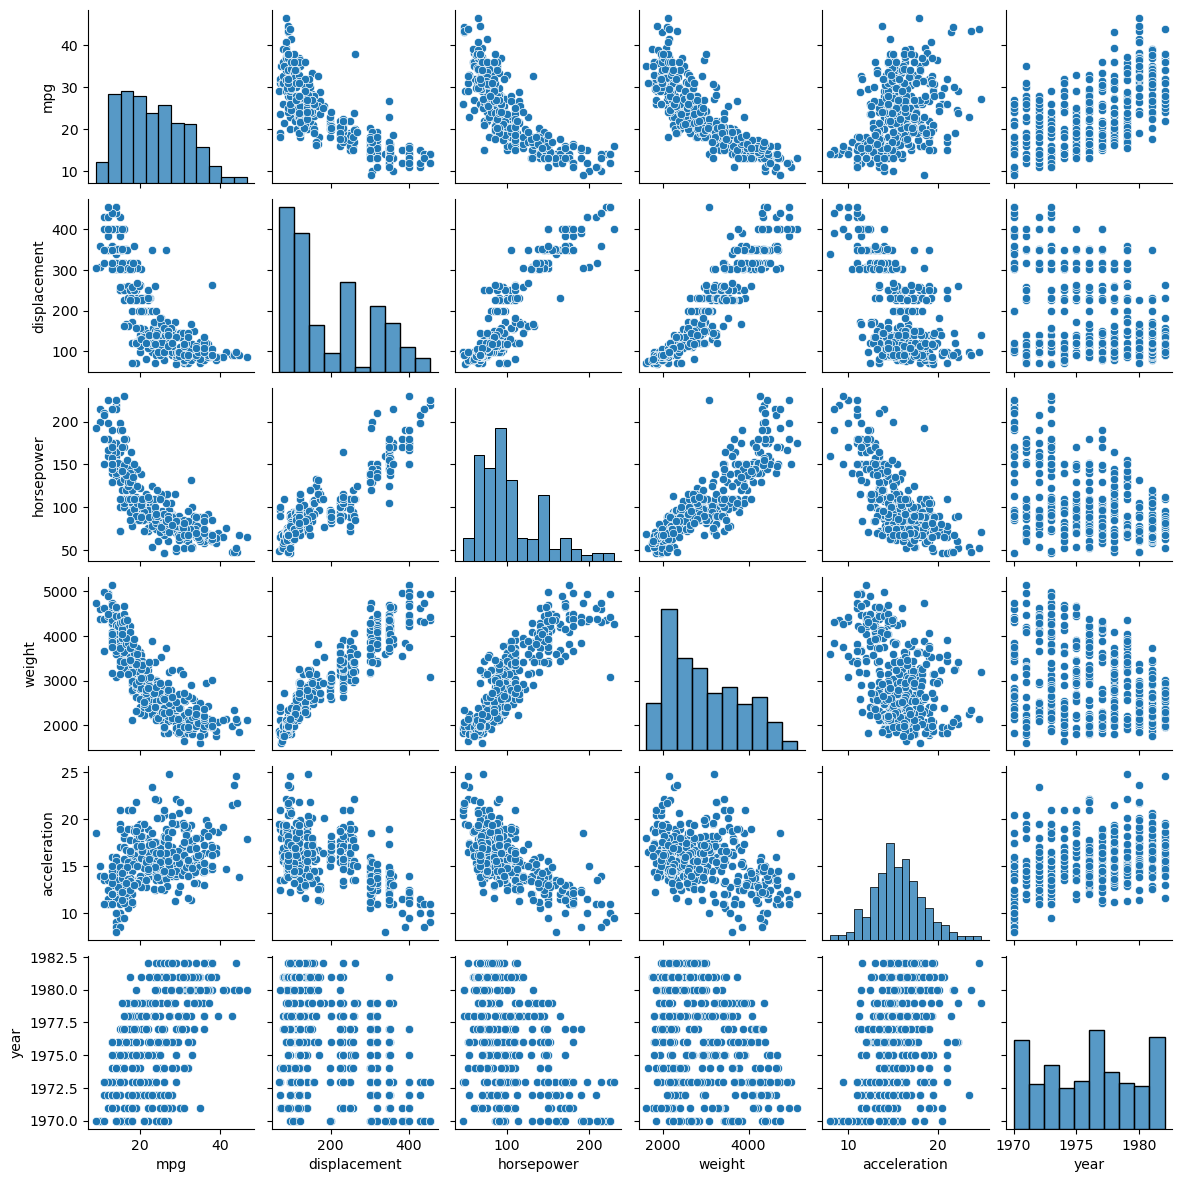

In [14]:
sns.pairplot(Auto[['mpg', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year']], height=2)
plt.show;

#### (b)

In [15]:
Auto_corr=Auto[['mpg', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year']].corr()
Auto_corr

,mpg,displacement,horsepower,weight,acceleration,year
mpg,1.000000,-0.805127,-0.778427,-0.832244,0.423329,0.580541
displacement,-0.805127,1.000000,0.897257,0.932994,-0.543800,-0.369855
horsepower,-0.778427,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.832244,0.932994,0.864538,1.000000,-0.416839,-0.309120
acceleration,0.423329,-0.543800,-0.689196,-0.416839,1.000000,0.290316
year,0.580541,-0.369855,-0.416361,-0.309120,0.290316,1.000000


<Axes: >

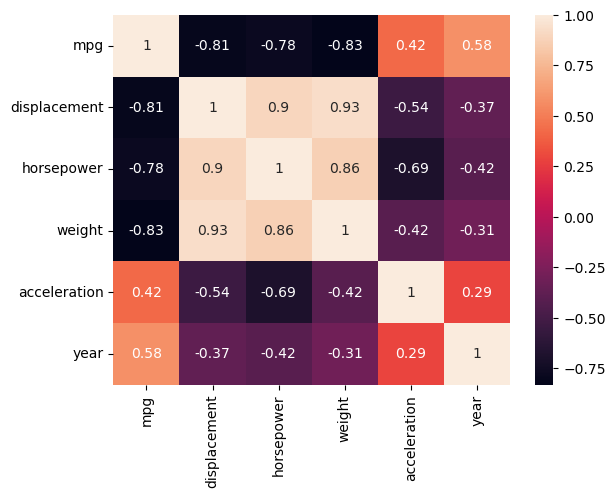

In [16]:
sns.heatmap(Auto_corr, annot=True)

#### (b)

In [17]:
X1= Auto.drop(['mpg','name'], axis=1)
X1=sm.add_constant(X1)
X1.shape

(392, 12)

In [18]:
model1 = sm.OLS(y, X1).fit()
ar1=round(model1.rsquared_adj,2)

i. [QUESTION] Is there a relationship between the predictors and the response?
Use the anova_lm() function from statsmodels to
answer this question.

In [19]:
print(f'p-value={model1.f_pvalue}')

p-value=2.385152858900937e-147


**[ANSWER] There is relationship between the predictor and the response as p-value is small**

ii. [QUESTION] Which predictors appear to have a statistically significant
relationship to the response?

In [20]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     191.1
Date:                Sun, 14 Apr 2024   Prob (F-statistic):          2.39e-147
Time:                        10:28:44   Log-Likelihood:                -993.35
No. Observations:                 392   AIC:                             2011.
Df Residuals:                     380   BIC:                             2058.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1422.3111     96.818    -14.691      0.000   -1612.678   -1231.944
displacement     0.0187      0.007      2.590      0.010       0.005       0.033
horsepower      -0.0349      0.013     -2.639      0.009      -0.061      -0.009
weight          -0.0058      0.001     -9.154      0.000      -0.007      -0.005
acceleration     0.0260      0.093      0.279      0.780      -0.157       0.209
year             0.7370      0.049     15.064      0.000       0.641       0.833
cylinders_4      6.7218      1.654      4.064      0.000       3.470       9.974
cylinders_5      7.0784      2.516      2.813      0.005       2.131      12.026
cylinders_6      3.3512      1.824      1.837      0.067      -0.236       6.938
cylinders_8      5.0992      2.109      2.418      0.016       0.953       9.246
origin_2         1.7640      0.551      3.200      0.001       0.680       2.848
origin_3         2.6172      0.527      4.964      0.000       1.581       3.654
==============================================================================
Omnibus:                       45.781   Durbin-Watson:                   1.336
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.634
Skew:                           0.677   Prob(JB):                     2.54e-19
Kurtosis:                       4.846   Cond. No.                     2.26e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.26e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**[ANSWER] all predictors except acceleration are statistically significant relationship to the response**

iii. [QUESTION] What does the coefficient for the year variable suggest?

**[ANSWER] Coefficient for the year show that the newer the car the higher mpg**

#### (d)

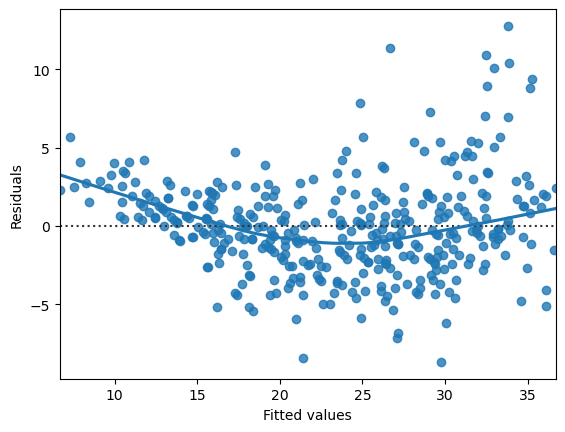

In [21]:
ax = sns.residplot(x=model1.fittedvalues,y=y,lowess=True)
ax.set(xlabel='Fitted values', ylabel='Residuals')
plt.show()

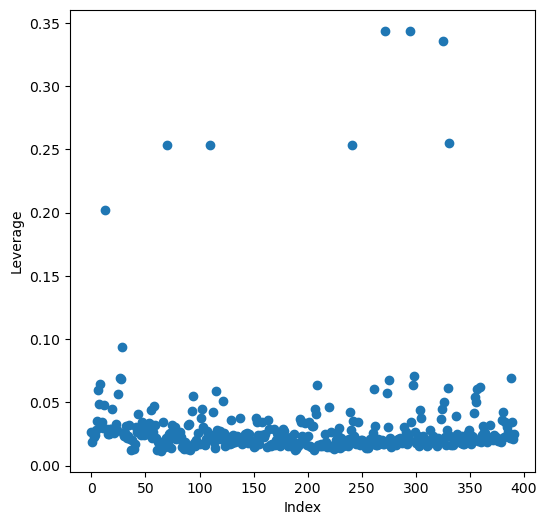

In [22]:
infl = model1.get_influence()
ax = subplots(figsize=(6,6))[1]
ax.scatter(np.arange(X1.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag);

In [23]:
print(f'[ANSWER] Observation # {np.argmax(infl.hat_matrix_diag)+1} has the biggest leverage')

[ANSWER] Observation # 273 has the biggest leverage


#### (e)

In [24]:
Auto_corr=Auto[['mpg', 'displacement', 'horsepower', 'weight', 'year']].corr()
Auto_corr

,mpg,displacement,horsepower,weight,year
mpg,1.000000,-0.805127,-0.778427,-0.832244,0.580541
displacement,-0.805127,1.000000,0.897257,0.932994,-0.369855
horsepower,-0.778427,0.897257,1.000000,0.864538,-0.416361
weight,-0.832244,0.932994,0.864538,1.000000,-0.309120
year,0.580541,-0.369855,-0.416361,-0.309120,1.000000


<Axes: >

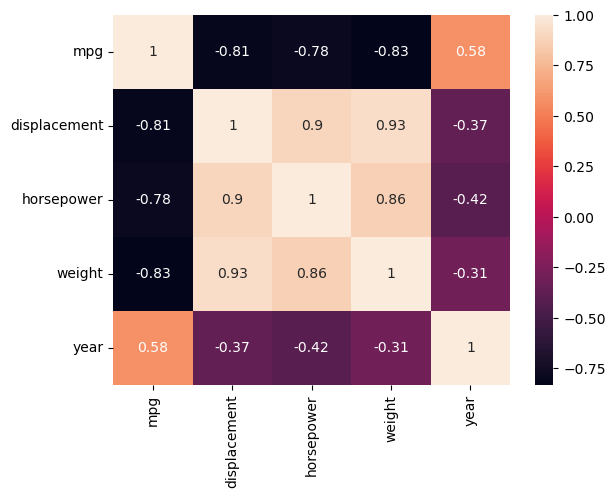

In [25]:
sns.heatmap(Auto_corr, annot=True)

In [26]:
model2 = smf.ols('mpg ~ displacement + horsepower + weight + year + horsepower/weight +  cylinders_4 + cylinders_5 + cylinders_6 + cylinders_8 + origin_2 + origin_3', data=Auto).fit()
ar2=round(model2.rsquared_adj,4)

In [27]:
print(f' {ar} vs. {ar1} vs. {ar2}')

 0.605 vs. 0.84 vs. 0.8664


**[ANSWER] Adding interaction horsepower/weight increases model adjusted R2**

#### (f)

In [28]:
model3 = smf.ols('mpg ~ np.log(displacement) + np.log(horsepower) + np.log(weight) + np.log(year) + horsepower/weight +  cylinders_4 + cylinders_5 + cylinders_6 + cylinders_8 + origin_2 + origin_3', data=Auto).fit()
ar3=round(model3.rsquared_adj,4)

In [29]:
model4 = smf.ols('mpg ~ np.sqrt(displacement) + np.sqrt(horsepower) + np.sqrt(weight) + np.sqrt(year) + horsepower/weight +  cylinders_4 + cylinders_5 + cylinders_6 + cylinders_8 + origin_2 + origin_3', data=Auto).fit()
ar4=round(model4.rsquared_adj,4)

In [30]:
model5 = smf.ols('mpg ~ np.power(displacement,2) + np.power(horsepower,2) + np.power(weight,2) + np.power(year,2) + horsepower/weight +  cylinders_4 + cylinders_5 + cylinders_6 + cylinders_8 + origin_2 + origin_3', data=Auto).fit()
ar5=round(model5.rsquared_adj,4)

In [31]:
print(f" {ar2} vs.{ar3} vs. {ar4} vs. {ar5}")

 0.8664 vs.0.8668 vs. 0.8671 vs. 0.8583


**[ANSWER] Sqrt transformation of all numerical predictors gives the highest R2 adjusted** 

***

### 10.

#### (a)

In [32]:
Seats = load_data('Carseats')
Seats = pd.get_dummies(Seats,columns=['Urban','US'], drop_first= True)
Seats.head(2)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,Bad,42,17,1,1
1,11.22,111,48,16,260,83,Good,65,10,1,1


In [33]:
mod = smf.ols("Sales ~ Price + Urban_Yes + US_Yes", data=Seats).fit()
ar1_1=round(mod.rsquared_adj,4)
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Sun, 14 Apr 2024   Prob (F-statistic):           2.39e-23
Time:                        10:28:45   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0435      0.651     20.036      0.000      11.764      14.323
Price         -0.0545      0.005    -10.389      0.000      -0.065      -0.044
Urban_Yes     -0.0219      0.272     -0.081      0.936      -0.556       0.512
US_Yes         1.2006      0.259      4.635      0.000       0.691       1.710
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### (b)

skipped

#### (c)

**[ANSWER] Y = 13.0435 - 0.0545 x Price - 0.0219 x Urban_Yes + 1.2006 x US_Yes** 


#### (d)

**[ANSWER] For Urban (Urban_Yes) hypothesis H0 is rejected** 

#### (e)

In [34]:
mod1 = smf.ols("Sales ~ Price + US_Yes", data=Seats).fit()
ar1_2=round(mod1.rsquared_adj,4)

#### (f)

In [35]:
print(f" [ANSWER] {ar1_1} vs.{ar1_2} ")

 [ANSWER] 0.2335 vs.0.2354 


#### (e)

In [36]:
mod1.conf_int(alpha=0.05, cols=None)

,0,1
Intercept,11.79032,14.271265
Price,-0.06476,-0.044195
US_Yes,0.69152,1.707766


#### (h)

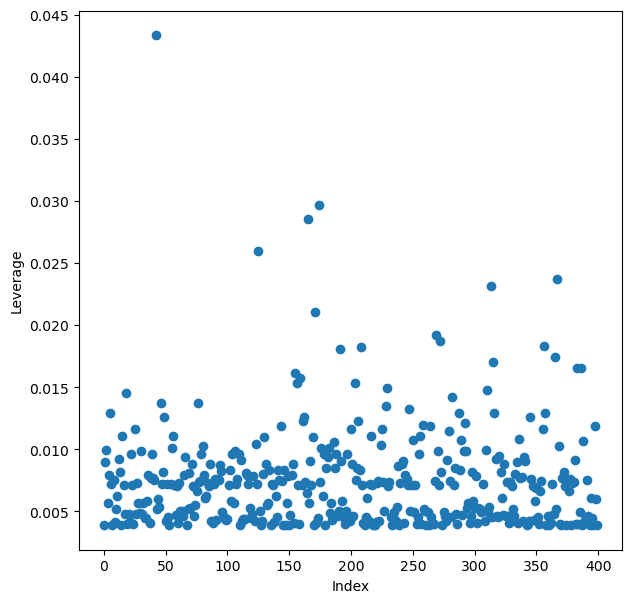

In [37]:
infl2 = mod1.get_influence()
ax = subplots(figsize=(7,7))[1]
ax.scatter(np.arange(Seats.shape[0]), infl2.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag);

In [38]:
print(f'[ANSWER] Observation # {np.argmax(infl2.hat_matrix_diag)+1} has the biggest leverage')

[ANSWER] Observation # 43 has the biggest leverage


***

### 11.

In [39]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = 2 * x + rng.normal(size=100)

#### (a)

In [40]:
df=pd.DataFrame(({'x':x,'y':y}))
mod_1 = smf.ols("y ~ x- 1", data=df).fit()
ar2_1=mod_1.rsquared_adj
mod_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              285.6
Date:                Sun, 14 Apr 2024   Prob (F-statistic):                    6.23e-31
Time:                        10:28:45   Log-Likelihood:                         -141.35
No. Observations:                 100   AIC:                                      284.7
Df Residuals:                      99   BIC:                                      287.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x              1.9762      0.117     16.898      0.000       1.744       2.208
==============================================================================
Omnibus:                        1.376   Durbin-Watson:                   2.184
Prob(Omnibus):                  0.503   Jarque-Bera (JB):                0.847
Skew:                           0.121   Prob(JB):                        0.655
Kurtosis:                       3.381   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### (b)

In [41]:
mod_2 = smf.ols("x ~ y- 1", data=df).fit()
ar2_2=mod_2.rsquared_adj
mod_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      x   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              285.6
Date:                Sun, 14 Apr 2024   Prob (F-statistic):                    6.23e-31
Time:                        10:28:45   Log-Likelihood:                         -58.349
No. Observations:                 100   AIC:                                      118.7
Df Residuals:                      99   BIC:                                      121.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
y              0.3757      0.022     16.898      0.000       0.332       0.420
==============================================================================
Omnibus:                       13.156   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               22.596
Skew:                          -0.528   Prob(JB):                     1.24e-05
Kurtosis:                       5.075   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### (c)

**[ANSWER] coef and std err are different for regression of x onto y vs regression of y onto x** 

#### (d)

skipped

#### (e)

**[ANSWER] t-statistic are the same because of commutativity**  

#### (f)

skipped

***

### 12.

Solution stolen from https://github.com/FlopsKa/iesl-solutions-python/blob/master/03_Linear_Regression_Applied.ipynb

#### (a)

 **[ANSWER] Coefficient are the same when the sum of the squares of the individual observations are the same**

#### (b)

In [42]:
x = np.random.normal(size=100)
y = 2 * x + np.random.normal(size=100)
data = pd.DataFrame({'x':x,'y':y})
mod = smf.ols(formula="x ~ y - 1", data=data).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      x   R-squared (uncentered):                   0.813
Model:                            OLS   Adj. R-squared (uncentered):              0.811
Method:                 Least Squares   F-statistic:                              431.5
Date:                Sun, 14 Apr 2024   Prob (F-statistic):                    7.24e-38
Time:                        10:28:45   Log-Likelihood:                         -66.895
No. Observations:                 100   AIC:                                      135.8
Df Residuals:                      99   BIC:                                      138.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
y              0.3884      0.019     20.772      0.000       0.351       0.426
==============================================================================
Omnibus:                        1.806   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.405   Jarque-Bera (JB):                1.784
Skew:                           0.253   Prob(JB):                        0.410
Kurtosis:                       2.584   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### (c)

In [43]:
xSum = np.sum(x**2)
ySum = np.sum(y**2)
xSum,ySum

(119.56546701842593, 644.6063742558874)

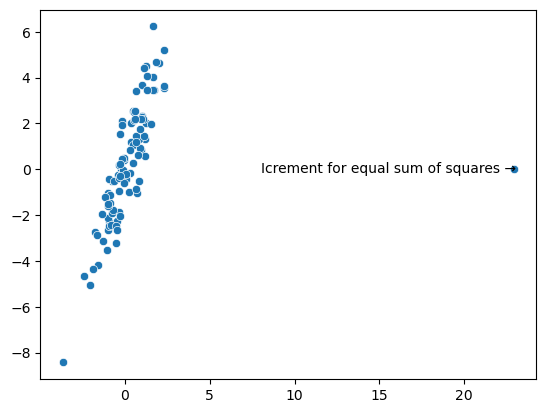

In [44]:
#added one element equal to difference between sum of squared yi and sum of squared xi
newX = np.append(x,np.sqrt(ySum-xSum))
#added one element equal to 0
newY = np.append(y,0)
ax = sns.scatterplot(x=newX, y=newY)
ax.text(8, -0.15, "Icrement for equal sum of squares →");

In [45]:
data = pd.DataFrame({'x':newX,'y':newY})
mod_40=smf.ols(formula="y ~ x - 1", data=data).fit()
mod_40.params[0]

0.3884200854895446

In [46]:
data = pd.DataFrame({'x':newX,'y':newY})
mod_41=smf.ols(formula="x ~ y - 1", data=data).fit()
print(f'{mod_41.params[0]} vs. {mod_41.params[0]}')

0.3884200854895447 vs. 0.3884200854895447


***

### 13.

#### (a)

In [47]:
rng = np.random.default_rng(1)
x = rng.normal(0,1,100)

#### (b)

In [48]:
eps = rng.normal(0,0.25,100)

#### (c)

In [49]:
y = x*0.5-1+eps

In [50]:
df = pd.DataFrame({'x' : x, 'y':y})
df.head(2)

,x,y
0,0.345584,-0.990028
1,0.821618,-0.373580


#### (d)

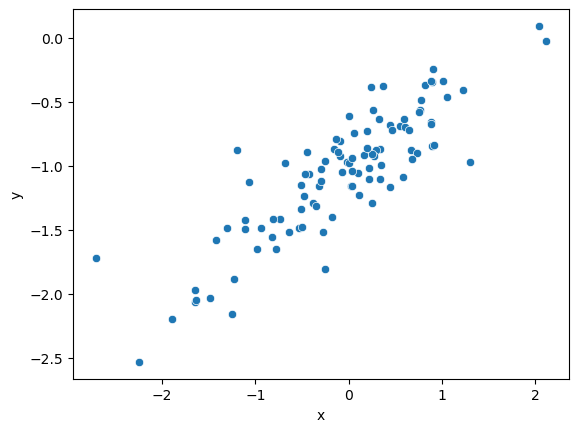

In [51]:
sns.scatterplot(x=df['x'], y=df['y']);

#### (e)

In [52]:
mod_10 = smf.ols("y ~ x", data=df).fit()
ar10_1=round(mod_10.rsquared_adj,2)
mod_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     280.0
Date:                Sun, 14 Apr 2024   Prob (F-statistic):           1.74e-30
Time:                        10:28:46   Log-Likelihood:                -2.4306
No. Observations:                 100   AIC:                             8.861
Df Residuals:                      98   BIC:                             14.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0190      0.025    -40.537      0.000      -1.069      -0.969
x              0.4921      0.029     16.734      0.000       0.434       0.551
==============================================================================
Omnibus:                        1.277   Durbin-Watson:                   2.198
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                0.759
Skew:                           0.114   Prob(JB):                        0.684
Kurtosis:                       3.361   Cond. No.                         1.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
mod_10.conf_int(alpha=0.05, cols=None)

,0,1
Intercept,-1.068891,-0.969122
x,0.433783,0.550508


**[ANSWER] Fitted model coefficients are close to real one (1.0190 vs -1.0) and (0.4921 vs. 0.5)** 

#### (f)

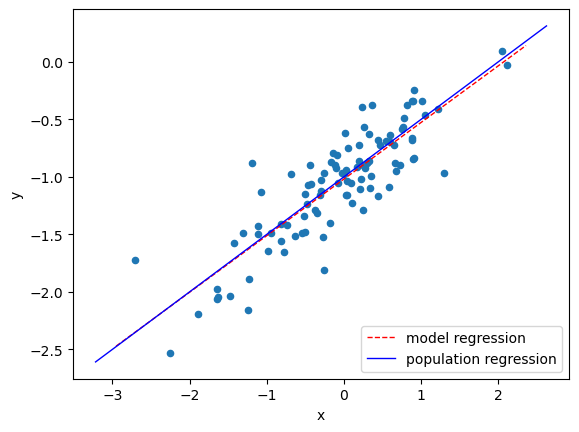

In [54]:
ax = df.plot.scatter('x', 'y')
abline(ax,
       mod_10.params[0],
       mod_10.params[1],
       'r--',
       linewidth=1, label='model regression')
abline(ax,
       -1,
       0.5,
       'b-',
       linewidth=1,label='population regression')
plt.legend(loc='lower right')


#### (g)

In [55]:
mod_11= smf.ols('y ~ x + np.power(x,2)', data=df).fit()
ar10_2=round(mod_11.rsquared_adj,2)
mod_11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     138.6
Date:                Sun, 14 Apr 2024   Prob (F-statistic):           3.66e-29
Time:                        10:28:46   Log-Likelihood:                -2.4293
No. Observations:                 100   AIC:                             10.86
Df Residuals:                      97   BIC:                             18.67
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.0182      0.030    -34.186      0.000      -1.077      -0.959
x                  0.4916      0.032     15.562      0.000       0.429       0.554
np.power(x, 2)    -0.0012      0.023     -0.052      0.959      -0.046       0.044
==============================================================================
Omnibus:                        1.338   Durbin-Watson:                   2.197
Prob(Omnibus):                  0.512   Jarque-Bera (JB):                0.814
Skew:                           0.119   Prob(JB):                        0.666
Kurtosis:                       3.372   Cond. No.                         2.23
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**[ANSWER] High p-value shows no significance of quadratic term** 

#### (h)

In [56]:
eps_l = rng.normal(0,0.125,100)
y_l = x*0.5-1+eps_l
df1 = pd.DataFrame({'x' : x, 'y':y_l})
mod_12 = smf.ols('y ~ x', data=df1).fit()
ar10_3=round(mod_12.rsquared_adj,2)
print(f" {ar10_1} vs. {ar10_2} vs. {ar10_3}")

 0.74 vs. 0.74 vs. 0.93


**[ANSWER] Model R2 adjusted higher for less noise case** 

#### (i)

In [57]:
eps_h = rng.normal(0,0.375,100)
y_h = x*0.5-1+eps_h
df2 = pd.DataFrame({'x' : x, 'y':y_h})
mod_13 = smf.ols('y ~ x', data=df2).fit()
ar10_4=round(mod_13.rsquared_adj,2)

In [58]:
print(f" {ar10_1} vs. {ar10_3} vs. {ar10_4}")

 0.74 vs. 0.93 vs. 0.68


**[ANSWER] Model R2 adjusted lower for less noise case** 

#### (j)

In [59]:
ci=mod_10.conf_int(alpha=0.05, cols=None)
ci = ci.rename(columns={0: 'Nom 0.025', 1: 'Nom 0.975'})
ci['Low 0.025'] = mod_12.conf_int(alpha=0.05, cols=None)[0]
ci['Low 0.975'] = mod_12.conf_int(alpha=0.05, cols=None)[1]
ci['Hi 0.025'] = mod_13.conf_int(alpha=0.05, cols=None)[0]
ci['Hi 0.975'] = mod_13.conf_int(alpha=0.05, cols=None)[1]
ci

,Nom 0.025,Nom 0.975,Low 0.025,Low 0.975,Hi 0.025,Hi 0.975
Intercept,-1.068891,-0.969122,-1.043205,-0.997277,-1.068517,-0.938353
x,0.433783,0.550508,0.471536,0.525269,0.478980,0.631266


**[ANSWER] The more noise the wider CI** 

***

### 14.

#### (a)

In [60]:
rng = np.random.default_rng (10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

**[ANSWER] Y = 2 + 2.0 x X1 + 0.3 x X2** 

#### (b)

<Axes: >

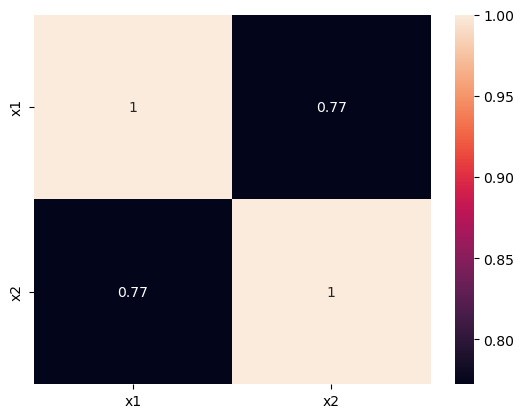

In [61]:
df3 = pd.DataFrame({'x1' : x1, 'x2' : x2,'y':y})
corr=df3[['x1', 'x2']].corr()
sns.heatmap(corr, annot=True)

#### (c)

In [62]:
mod_14= smf.ols('y ~ x1 + x2', data=df3).fit()
ar11_1=round(mod_14.rsquared_adj,2)
mod_14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     19.89
Date:                Sun, 14 Apr 2024   Prob (F-statistic):           5.76e-08
Time:                        10:28:46   Log-Likelihood:                -130.62
No. Observations:                 100   AIC:                             267.2
Df Residuals:                      97   BIC:                             275.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9579      0.190     10.319      0.000       1.581       2.334
x1             1.6154      0.527      3.065      0.003       0.569       2.661
x2             0.9428      0.831      1.134      0.259      -0.707       2.592
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.041
Skew:                          -0.036   Prob(JB):                        0.979
Kurtosis:                       2.931   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**[ANSWER] Hypothesis H0 should be rejected for X2 coeficient**

#### (d)

In [63]:
mod_15= smf.ols('y ~ x1', data=df3).fit()
ar11_2=round(mod_15.rsquared_adj,2)
mod_15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     38.39
Date:                Sun, 14 Apr 2024   Prob (F-statistic):           1.37e-08
Time:                        10:28:46   Log-Likelihood:                -131.28
No. Observations:                 100   AIC:                             266.6
Df Residuals:                      98   BIC:                             271.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9371      0.189     10.242      0.000       1.562       2.312
x1             2.0771      0.335      6.196      0.000       1.412       2.742
==============================================================================
Omnibus:                        0.204   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.903   Jarque-Bera (JB):                0.042
Skew:                          -0.046   Prob(JB):                        0.979
Kurtosis:                       3.038   Cond. No.                         4.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
print(f" {ar11_1} vs. {ar11_1}")

 0.28 vs. 0.28


**[ANSWER] Hypothesis H0 shouldn't be rejected for X1 coeficient**

#### (e)

In [65]:
mod_16= smf.ols('y ~ x2', data=df3).fit()
ar11_3=round(mod_16.rsquared_adj,2)
mod_16.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     27.99
Date:                Sun, 14 Apr 2024   Prob (F-statistic):           7.43e-07
Time:                        10:28:46   Log-Likelihood:                -135.24
No. Observations:                 100   AIC:                             274.5
Df Residuals:                      98   BIC:                             279.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3239      0.154     15.124      0.000       2.019       2.629
x2             2.9103      0.550      5.291      0.000       1.819       4.002
==============================================================================
Omnibus:                        0.191   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.909   Jarque-Bera (JB):                0.373
Skew:                          -0.034   Prob(JB):                        0.830
Kurtosis:                       2.709   Cond. No.                         6.11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
print(f" {ar11_1} vs. {ar11_2} vs. {ar11_3}")

 0.28 vs. 0.27 vs. 0.21


**[ANSWER] Hypothesis H0 shouldn't be rejected for X2 coeficient**

#### (f)

**[ANSWER] There is no contradiction as only in case when X1 and X2 both present in model one of them is redundant**

#### (g)

In [67]:
x1 = np.concatenate([x1, [0.1]])
x2 = np.concatenate([x2, [0.8]])
y = np.concatenate([y, [6]])
df4 = pd.DataFrame({'x1' : x1, 'x2' : x2,'y':y})

In [68]:
mod_20= smf.ols('y ~ x1 + x2', data=df4).fit()
ar20_1=round(mod_20.rsquared_adj,2)

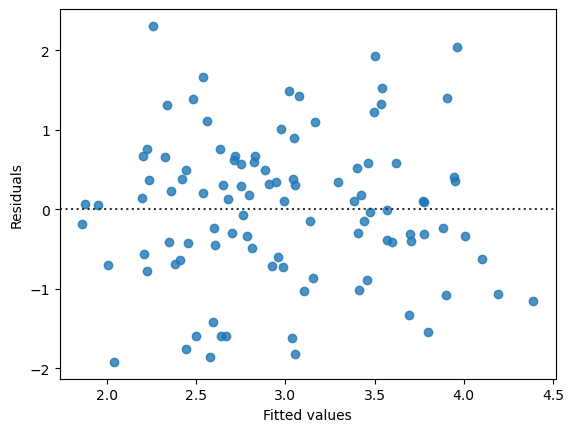

In [69]:
ax = sns.residplot(x=mod_20.fittedvalues,y=y)
ax.set(xlabel='Fitted values', ylabel='Residuals')
plt.show()

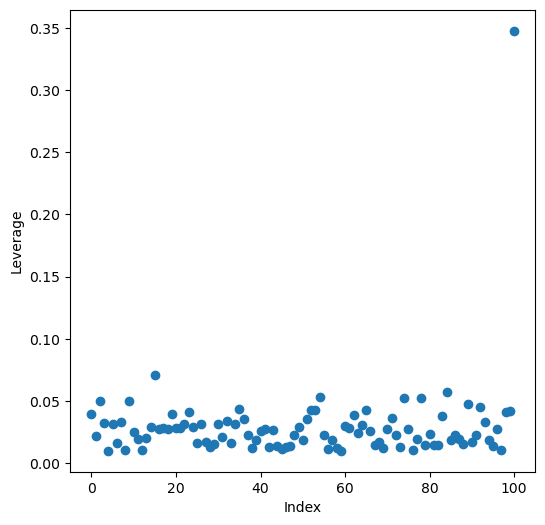

In [70]:
infl3 = mod_20.get_influence()
ax = subplots(figsize=(6,6))[1]
ax.scatter(np.arange(x1.shape[0]), infl3.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag);

In [71]:
print(f'[ANSWER] Observation # {np.argmax(infl3.hat_matrix_diag)+1} has the biggest leverage')

[ANSWER] Observation # 101 has the biggest leverage


In [72]:
mod_21= smf.ols('y ~ x1', data=df4).fit()
ar20_2=round(mod_21.rsquared_adj,2)

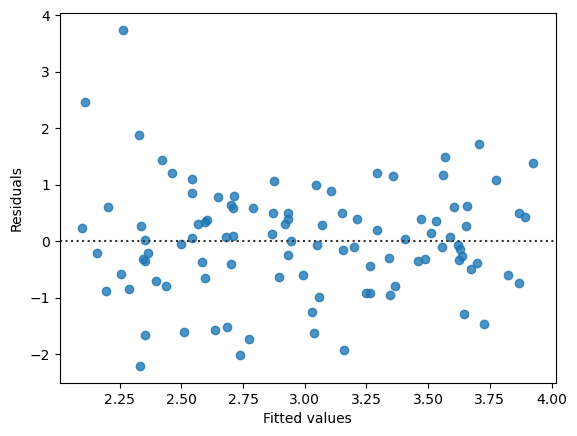

In [73]:
ax = sns.residplot(x=mod_21.fittedvalues,y=y)
ax.set(xlabel='Fitted values', ylabel='Residuals')
plt.show()

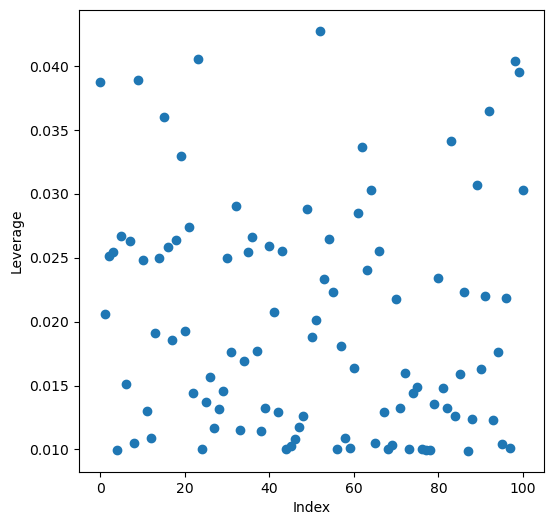

In [74]:
infl4 = mod_21.get_influence()
ax = subplots(figsize=(6,6))[1]
ax.scatter(np.arange(x1.shape[0]), infl4.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag);

In [75]:
mod_22= smf.ols('y ~ x2', data=df4).fit()
ar20_3=round(mod_22.rsquared_adj,2)

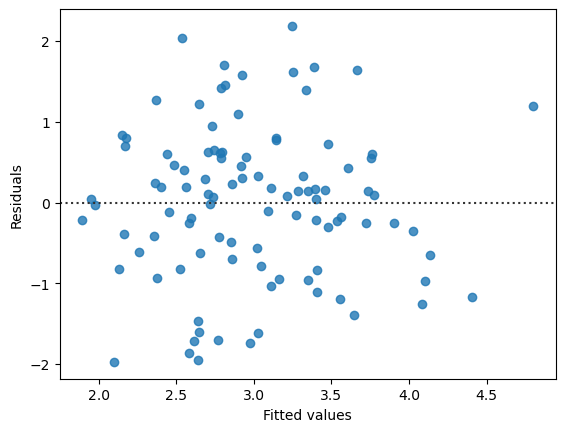

In [76]:
ax = sns.residplot(x=mod_22.fittedvalues,y=y)
ax.set(xlabel='Fitted values', ylabel='Residuals')
plt.show()

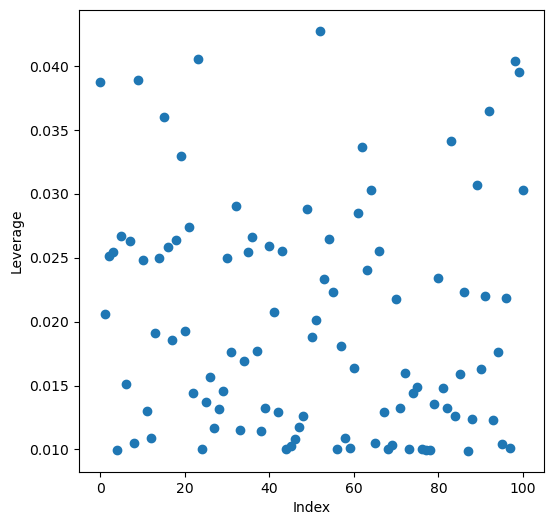

In [77]:
infl5 = mod_22.get_influence()
ax = subplots(figsize=(6,6))[1]
ax.scatter(np.arange(x1.shape[0]), infl4.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag);

In [78]:
print(f" {ar20_1} vs. {ar20_2} vs. {ar20_3}")

 0.28 vs. 0.21 vs. 0.26


**[ANSWER] When only X1 present in model R2 adjusted drops. There are outliers and high-leverage observations**

***

### 15.

#### (a)

In [79]:
Boston = load_data('Boston')
Boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


In [80]:
predictors = Boston.drop('crim',axis=1).columns
predictors

Index(['zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

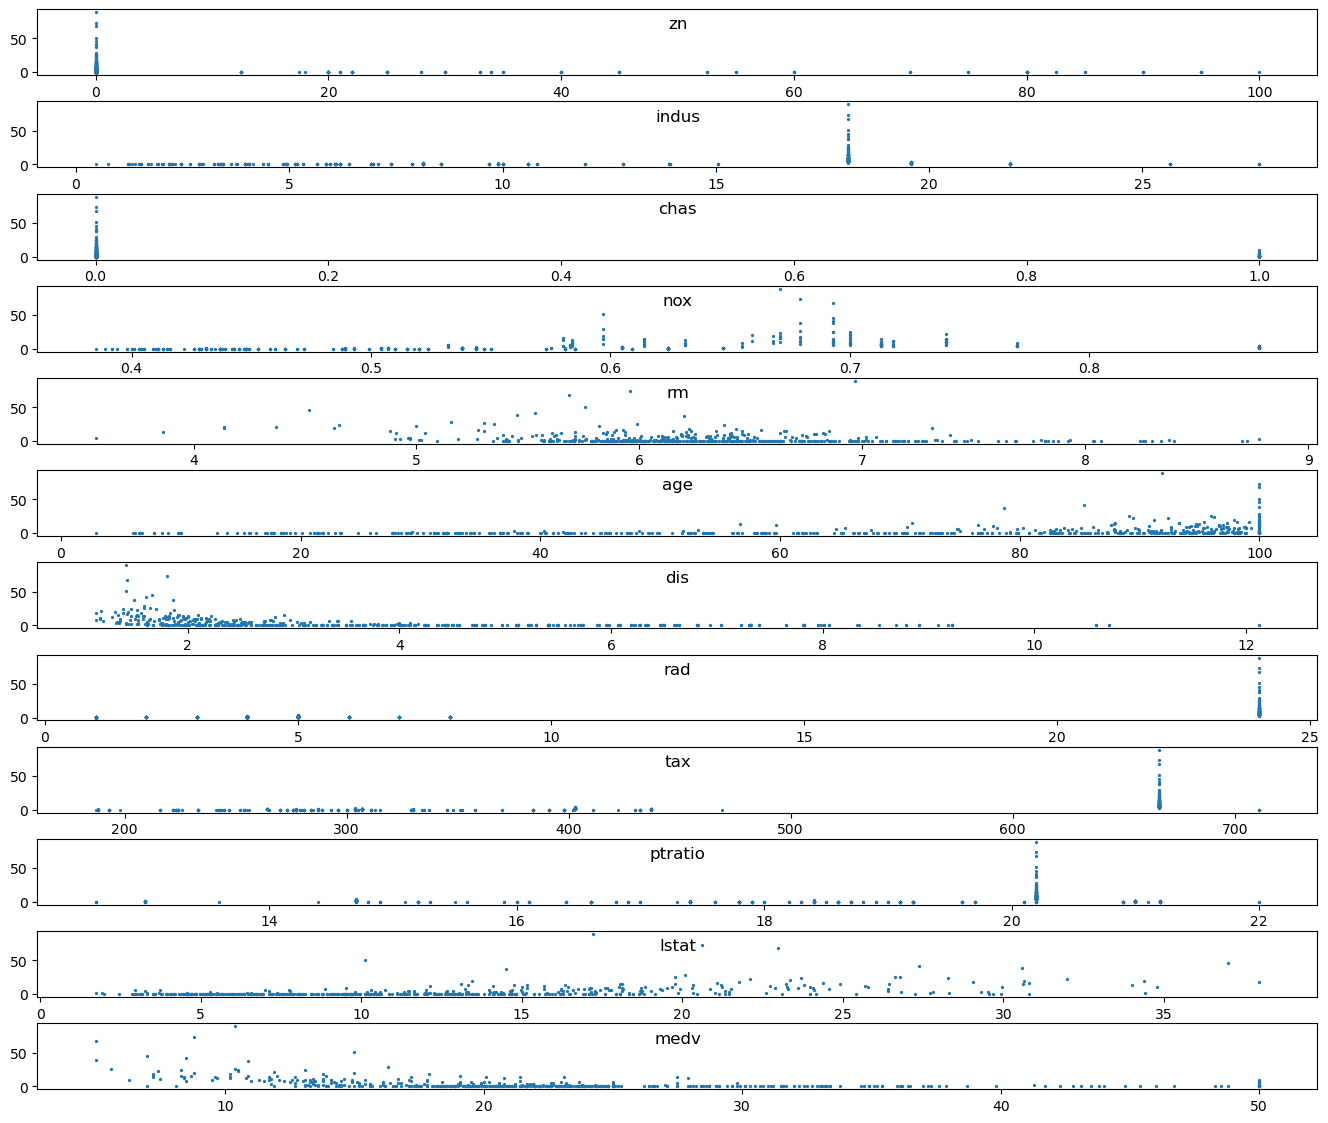

In [81]:
significant=[]
coef={}
fig, axes = plt.subplots(nrows = len(predictors),figsize=(16,12))
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1, 
                    wspace=0.4, 
                    hspace=0.4)
for i, predictor in enumerate(predictors):
    model=sm.OLS(Boston['crim'], Boston[predictor]).fit()
    axes[i].scatter(Boston[predictor],Boston['crim'],s=1.8)
    axes[i].set_title(predictor, y=1.0, pad=-14)
    if model.pvalues[0]<=0.05:
        significant.append(predictor)
        coef[predictor]=model.params[0]

In [82]:
print(f'[ANSWER] Following predictors have statistically significant association with the response: {significant}')

[ANSWER] Following predictors have statistically significant association with the response: ['indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'lstat', 'medv']


#### (b)

In [83]:
mod_30= smf.ols('crim ~ indus + nox + rm + age + dis + rad + tax + ptratio + lstat + medv', data=Boston).fit()
ar30_1=round(mod_30.rsquared_adj,2)
mod_30.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     39.23
Date:                Sun, 14 Apr 2024   Prob (F-statistic):           1.17e-56
Time:                        10:28:49   Log-Likelihood:                -1658.7
No. Observations:                 506   AIC:                             3339.
Df Residuals:                     495   BIC:                             3386.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.5314      7.112      1.903      0.058      -0.441      27.504
indus         -0.0871      0.083     -1.049      0.295      -0.250       0.076
nox          -10.3597      5.303     -1.954      0.051     -20.778       0.058
rm             0.7814      0.607      1.288      0.198      -0.411       1.974
age           -0.0068      0.018     -0.383      0.702      -0.042       0.028
dis           -0.7331      0.258     -2.842      0.005      -1.240      -0.226
rad            0.5857      0.087      6.715      0.000       0.414       0.757
tax           -0.0004      0.005     -0.080      0.936      -0.010       0.009
ptratio       -0.4156      0.181     -2.299      0.022      -0.771      -0.060
lstat          0.1614      0.075      2.138      0.033       0.013       0.310
medv          -0.2069      0.059     -3.516      0.000      -0.322      -0.091
==============================================================================
Omnibus:                      662.323   Durbin-Watson:                   1.497
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            79966.582
Skew:                           6.563   Prob(JB):                         0.00
Kurtosis:                      63.171   Cond. No.                     1.24e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### (c)

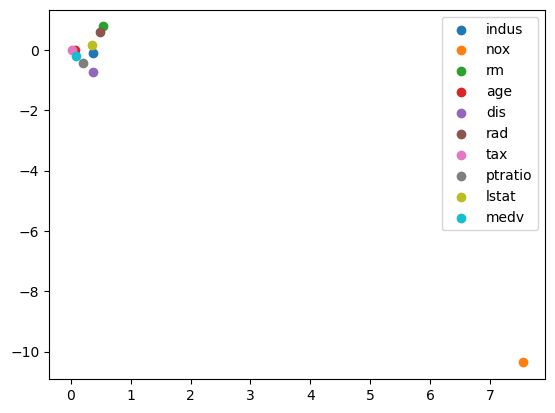

In [84]:
i=1
for key, value in coef.items():
    plt.scatter(value,mod_30.params[i],label=key)
    plt.legend(loc='upper right')
    i+=1

#### (d)

In [85]:
for i, predictor in enumerate(predictors):
    model=smf.ols(f'crim ~ {predictor} + np.power({predictor},2) + np.power({predictor},3)', data=Boston).fit()
    if model.pvalues[2]<=0.05:
        text1='quadratic association (+), '
    else:
        text1='quadratic association (-), '
    if model.pvalues[3]<=0.05:
        text2='for cubic association (+).'
    else:
        text2='cubic association (-).'
    print(f'{predictor}: {text1}{text2}')

zn: quadratic association (-), cubic association (-).
indus: quadratic association (+), for cubic association (+).
chas: quadratic association (-), cubic association (-).
nox: quadratic association (+), for cubic association (+).
rm: quadratic association (-), cubic association (-).
age: quadratic association (+), for cubic association (+).
dis: quadratic association (+), for cubic association (+).
rad: quadratic association (-), cubic association (-).
tax: quadratic association (-), cubic association (-).
ptratio: quadratic association (+), for cubic association (+).
lstat: quadratic association (-), cubic association (-).
medv: quadratic association (+), for cubic association (+).


***